In [2]:
# Python Remote Object，應用可以在網路下相互通用
# 對同一個對象（分配）調用很多次時，可以使用批量調用方法來極大的提高效能
import pyro
import pyro.distributions as dist # 套件內部選擇機率分佈
import numpy as np
import scipy.stats as stats # science python中的 statistics模組
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns      # 另一繪圖套件
import warnings            # 將一些警示通知的訊息略過
warnings.filterwarnings('ignore')

In [3]:
# 給定一個母體，定義beta分配的參數。 alpha = 1,beta = 9 
param = (1, 9) 
distribution = dist.Beta(*param)
print(distribution)
print("母體平均數:{:.4f}, 母體標準差:{:.4f}"  \
      .format(distribution.mean, distribution.stddev))

Beta()
母體平均數:0.1000, 母體標準差:0.0905


樣本平均數:0.0874, 樣本標準差:0.0781


<AxesSubplot:ylabel='Density'>

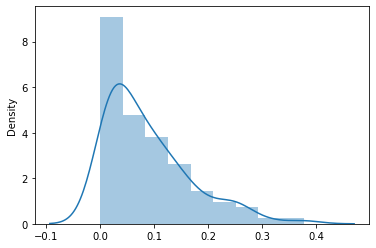

In [4]:
# 嘗試用此beta分配母體來sample出一些樣本
n = 100
samples = distribution.sample((n,)) # sample 出100個樣本
print("樣本平均數:{:.4f}, 樣本標準差:{:.4f}"  \
      .format(samples.mean(), samples.std()))

# 嘗試畫出樣本圖形來看樣本分佈，sns呼喚seaborn，sns.distplot集合了
# hist直方圖函數與分佈觀測線條函數
sns.distplot(samples) 

In [9]:
# 改變n的大小, 用此母體sample出一些樣本 
# 並用Kolmogorov-Smirnov-test來檢驗是否符合常態分佈
# 假定若Kolmogorov-Smirnov-test的p-value小於0.01就視為常態分佈
# 可以從beta分配之樣本平均數, 樣本數n,和樣本標準差σ估算99%信心水準的信賴區間
alpha = 0.01 # 可容忍的型一誤差設定為0.01 
confidence_level = 1-alpha # 信賴水準99%
mu = distribution.mean.numpy() # 母體平均數
sigma = distribution.stddev.numpy() # 母體標準差
dis_cdf = stats.norm.ppf(1-alpha/2) # 回傳累積分配函數中對應的x

# 新增一個表格中欄位分別為以下
columns=["樣本數n", "樣本平均數", "樣本標準差", "KS-test p-value",  \
         "KS-test 是否為常態分佈", "信賴區間_下界", "信賴區間_上界", \
         "母體平均數是否落在信賴區間內" ]
rows = []   # 設定為空集合，之後資料處理後會陸續填入
samples_collect = {}  
for n in range(1,101):
    samples = distribution.sample((n,))
    samples_collect.update({n:samples})  # 更新資料後陸續填入 n=1~101
    # 樣本平均,樣本標準差分別求出,設定為numpy形態以寫入空集合
    mean_sample, std_sample = samples.mean().numpy(), samples.std().numpy()
    # 底線表示不需要用到的參數，kstest中只需用到 p-value,檢測是否符合
    # 常態分配 normal distribution
    _,value = stats.kstest(np.array(samples),"norm") 
    value1 = 1-value
    # 信賴區間的lower_bond與 upper_bond
    CI_lb = mean_sample-dis_cdf*sigma/np.sqrt(n)
    CI_ub = mean_sample+dis_cdf*sigma/np.sqrt(n)
    
    rows.append([n, 
                 mean_sample.round(4), 
                 std_sample.round(4), 
                 value1, 
                 value<0.01,
                 CI_lb.round(4),
                 CI_ub.round(4),
                 (CI_lb<=mu)&(CI_ub>=mu)
                ])
    
df = pd.DataFrame(data=rows, columns=columns)   
df.head(20)

,樣本數n,樣本平均數,樣本標準差,KS-test p-value,KS-test 是否為常態分佈,信賴區間_下界,信賴區間_上界,母體平均數是否落在信賴區間內
0,1,0.0428,NaN,0.034131,False,-0.1902,0.2758,True
1,2,0.0212,0.0262,0.502162,False,-0.1435,0.1860,True
2,3,0.1389,0.0884,0.725727,False,0.0044,0.2735,True
3,4,0.0596,0.0267,0.833389,False,-0.0569,0.1761,True
4,5,0.0743,0.0498,0.899682,False,-0.0299,0.1785,True
5,6,0.1101,0.0763,0.943885,False,0.0150,0.2052,True
6,7,0.1043,0.0805,0.966729,False,0.0163,0.1924,True
7,8,0.0890,0.0862,0.978340,False,0.0066,0.1714,True
8,9,0.0653,0.0471,0.987737,False,-0.0124,0.1430,True
9,10,0.0764,0.0717,0.992310,True,0.0027,0.1500,True


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

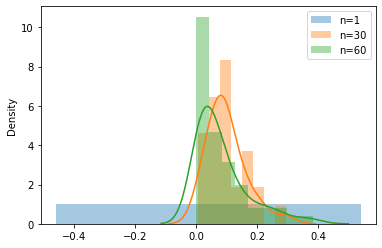

In [19]:
# 嘗試畫出圖形來看分佈, n = 1,30,60
for n in [1,30,60]:
    samples = samples_collect[n]
    sns.distplot(samples, label="n="+str(n))
plt.legend()
plt.show()

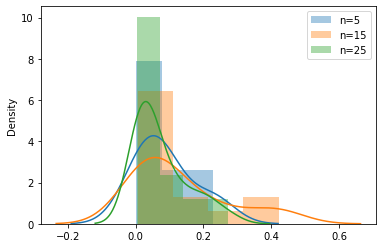

In [13]:
# 嘗試畫出圖形來看分佈, n = 5,15,25
for n in [5,15,25]:
    samples = samples_collect[n]
    sns.distplot(samples, label="n="+str(n))
plt.legend()
plt.show()